In [1]:
from tkinter import *
import numpy as np

def showQuality():
    new = np.array([[float(e1.get()),float(e2.get()),float(e3.get()),float(e4.get()),float(e5.get()),float(e6.get()),float(e7.get()),float(e8.get()),float(e9.get()),float(e10.get()),float(e11.get())]])
    Ans = RF_clf.predict(new)
    fin=str(Ans)[1:-1]#IT WILL remove[ ]
    quality.insert(0, fin)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For this kernel, I amm only using the red wine dataset
data = pd.read_csv('winequality-red.csv')
data.head()

#Summary statistics
data.describe()

#All columns has the same number of data points
extra = data[data.duplicated()]
extra.shape


(240, 12)

(1599,) (1599, 11)


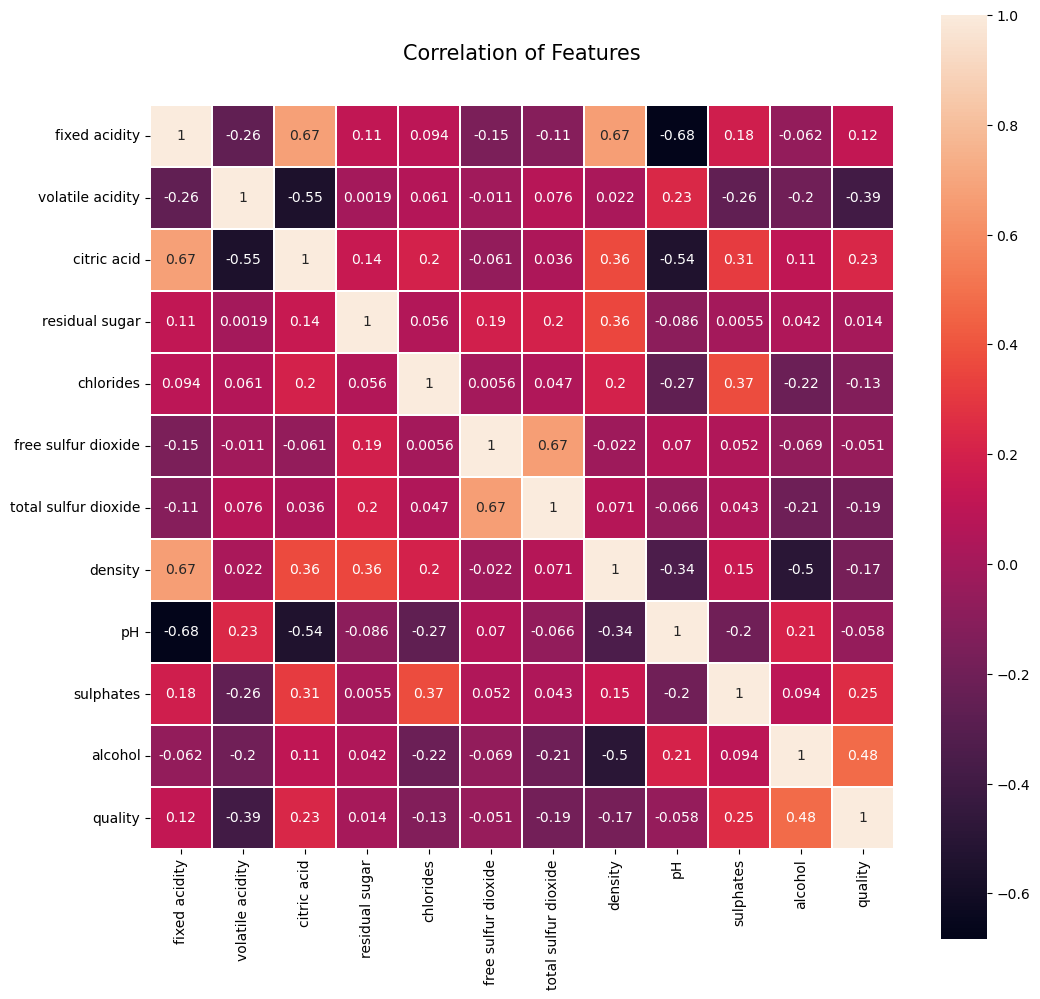

In [3]:
# Let's proceed to separate 'quality' as the target variable and the rest as features.
y = data.quality                  # set 'quality' as target
X = data.drop('quality', axis=1)  # rest are features
print(y.shape, X.shape)

#Let's look at the correlation among the variables using Correlation chart
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, 
            linecolor='white', annot=True)

#Use Random Forest Classifier to train a prediction model

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix

#Split data into training and test datasets
seed = 8 # set seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=seed)


In [4]:
#Train and evaluate the Random Forest Classifier with Cross Validation
# Instantiate the Random Forest Classifier
RF_clf = RandomForestClassifier(random_state=seed)


# Compute k-fold cross validation on training dataset and see mean accuracy score
cv_scores = cross_val_score(RF_clf,X_train, y_train, cv=10, scoring='accuracy')

#Perform predictions
RF_clf.fit(X_train, y_train)
pred_RF = RF_clf.predict(X_test)

C:\Users\dkcha\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 6 members, which is less than n_splits=10.
  warnings.warn(


In [5]:
master = Tk()

Label(master, text="Fixed Acidity", anchor="nw", width=15).grid(row=0)
Label(master, text="Volatile Acidity", anchor="nw", width=15).grid(row=1)
Label(master, text="Citric Acid", anchor="nw", width=15).grid(row=2)
Label(master, text="Residual Sugar", anchor="nw", width=15).grid(row=3)
Label(master, text="Chlorides", anchor="nw", width=15).grid(row=4)
Label(master, text="Sulfur Dioxide", anchor="nw", width=15).grid(row=5)
Label(master, text="Total Sulfur Dioxide", anchor="nw", width=15).grid(row=6)
Label(master, text="Density", anchor="nw", width=15).grid(row=7)
Label(master, text="pH", anchor="nw", width=15).grid(row=8)
Label(master, text="Sulphates", anchor="nw", width=15).grid(row=9)
Label(master, text="Alcohol", anchor="nw", width=15).grid(row=10)
Label(master, text = "Quality", anchor="nw", width=15).grid(row=13)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
quality = Entry(master)

e1.grid(row=0, column=1)
e2.grid(row=1, column=1)
e3.grid(row=2, column=1)
e4.grid(row=3, column=1)
e5.grid(row=4, column=1)
e6.grid(row=5, column=1)
e7.grid(row=6, column=1)
e8.grid(row=7, column=1)
e9.grid(row=8, column=1)
e10.grid(row=9, column=1)
e11.grid(row=10, column=1)
quality.grid(row=13, column=1)

Button(master, text='Quit', command=master.destroy,width=15).grid(row=11, column=0, sticky=W, pady=4)
Button(master, text='Find Quality', command=showQuality,width=17).grid(row=11, column=1, sticky=W, pady=4)
Button(master, text='Project By',width=15).grid(row=14, column=0, sticky=W, pady=4)
Button(master, text='Mayur S. Satav',width=17).grid(row=14, column=1, sticky=W, pady=4)

mainloop( )
